# SOC 210B Assignment 3
_M. Nolan Gray_

In [3]:
# Importing libraries, checking out the dataset!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [4]:
dtafile = './Data/Crime2.dta'
df = pd.read_stata(dtafile)
df.sample(5)

,state,violent,murder,metro,white,HS,poverty
32,NV,614.0,9.0,91.500000,82.500000,86.300003,8.7
5,CO,345.0,4.0,84.500000,90.300003,88.300003,7.3
33,NY,465.0,5.0,87.500000,73.900002,85.400002,10.7
24,MS,326.0,9.0,48.799999,61.299999,83.000000,16.4
27,ND,78.0,2.0,55.900002,92.400002,89.500000,8.4


## Question 1

In [5]:
import seaborn as sn

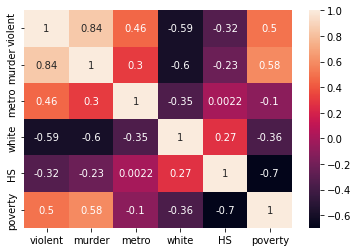

In [6]:
corremat = df.corr()
sn.heatmap(corremat, annot=True)
plt.show()

Okay, so based on this, "metro" and "HS" have the least association, i.e. are closest to zero. Let's run some regressions. 

Notes:
* Not totally sure if "least" association meant _weakest_ association (i.e. closest to 0) or _strongest negative_ association (i.e. closest to -1), but I'm going with the former based on the wording of Question 2. 
* I had to search out the ReadMe to figure out what "metro" meant. (Bad field name, boo!) The ReadMe had a typo ("recent [sic] in metropolitan areas"), but I'm assuming this is meant to be some measure of urbanization?

### Regressions

In [22]:
# this is a really clumsy way of having to do this -- need to write a function for putting these into a single table...
# regression 1: metro-violent
X1 = df[['metro']]
y1 = df['violent']
X1 = sm.add_constant(X1)
reg1 = sm.OLS(y1, X1).fit()
reg1.summary()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                violent   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     12.97
Date:                Fri, 28 Jan 2022   Prob (F-statistic):           0.000739
Time:                        07:13:13   Log-Likelihood:                -345.94
No. Observations:                  51   AIC:                             695.9
Df Residuals:                      49   BIC:                             699.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -98.8933    148.917     -0.664      0.510    -398.153     200.367
metro          7.2645      2.017      3.601      0.001       3.210      11.319
==============================================================================
Omnibus:                       37.964   Durbin-Watson:                   1.706
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.894
Skew:                           1.968   Prob(JB):                     2.79e-28
Kurtosis:                       9.650   Cond. No.                         360.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
# regression 2: HS-violent
X2 = df[['HS']]
y2 = df['violent']
X2 = sm.add_constant(X2)
reg2 = sm.OLS(y2, X2).fit()
reg2.summary()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                violent   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     5.693
Date:                Fri, 28 Jan 2022   Prob (F-statistic):             0.0209
Time:                        06:08:54   Log-Likelihood:                -349.12
No. Observations:                  51   AIC:                             702.2
Df Residuals:                      49   BIC:                             706.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2297.3618    785.009      2.927      0.005     719.827    3874.897
HS           -21.6440      9.071     -2.386      0.021     -39.874      -3.414
==============================================================================
Omnibus:                       54.574   Durbin-Watson:                   1.614
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              357.933
Skew:                           2.694   Prob(JB):                     1.89e-78
Kurtosis:                      14.807   Cond. No.                     2.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
# regression 3: metro/HS-violent
X3 = df[['metro','HS']]
y3 = df['violent']
X3 = sm.add_constant(X3)
reg3 = sm.OLS(y3, X3).fit()
reg3.summary()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                violent   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     10.99
Date:                Fri, 28 Jan 2022   Prob (F-statistic):           0.000118
Time:                        06:10:13   Log-Likelihood:                -342.31
No. Observations:                  51   AIC:                             690.6
Df Residuals:                      48   BIC:                             696.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1777.6425    707.160      2.514      0.015     355.803    3199.482
metro          7.2761      1.899      3.832      0.000       3.459      11.093
HS           -21.7130      8.020     -2.707      0.009     -37.839      -5.587
==============================================================================
Omnibus:                       47.263   Durbin-Watson:                   1.617
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              236.139
Skew:                           2.347   Prob(JB):                     5.29e-52
Kurtosis:                      12.439   Cond. No.                     2.79e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Interpretation

Okay, so:
* Percent incorporated by metrpolitan areas has a statistically significant modest positive association (R² = 0.209) with violent crime. That is to say, as more of a state is incorporated within metropolitan areas, we tend to see higher rates of violent crime. 
* Percent high school graduates has a statistically significant [slightly weaker] modest negative association (R² = 0.104) with violent crime. That is to say, as the share of the population with a high school degree rises, we tend to see lower rates of violent crime. 
* A model that includes both variables finds an overall statistically significant [slightly stronger] modest association (R² = 0.314). The coefficients for both explanatory variables go largely unchanged in terms of direction, magnitude, and significance.

If I were interested in one of these variables, I probably wouldn't bother to include the other in my model. Neither of the coefficients change to any reasonable degree in terms of direction, maginitude, or significance, meaning that you are getting a clear sense of the relationship without the other variable.

(Also, the F-Score for the combined model is actually lower than for the metro-violent model. Am I correct in interpreting that it's an inferior model?)



## Question 2

Based on the correlation matrix above, "poverty" and "HS" have the strongest association. (Notably, this is a negative association!) Let's run some regressions.

### Regressions

In [20]:
# regression 4: poverty-violent
X4 = df[['poverty']]
y4 = df['violent']
X4 = sm.add_constant(X4)
reg4 = sm.OLS(y4, X4).fit()
reg4.summary()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                violent   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     15.99
Date:                Fri, 28 Jan 2022   Prob (F-statistic):           0.000215
Time:                        06:46:50   Log-Likelihood:                -344.72
No. Observations:                  51   AIC:                             693.4
Df Residuals:                      49   BIC:                             697.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         60.4765     96.140      0.629      0.532    -132.724     253.677
poverty       38.4482      9.616      3.998      0.000      19.125      57.772
==============================================================================
Omnibus:                       21.497   Durbin-Watson:                   1.725
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.325
Skew:                           1.237   Prob(JB):                     1.75e-09
Kurtosis:                       6.586   Cond. No.                         32.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# regression 5: HS-violent
X5 = df[['HS']]
y5 = df['violent']
X5 = sm.add_constant(X5)
reg5 = sm.OLS(y5, X5).fit()
reg5.summary()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                violent   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     5.693
Date:                Fri, 28 Jan 2022   Prob (F-statistic):             0.0209
Time:                        06:46:42   Log-Likelihood:                -349.12
No. Observations:                  51   AIC:                             702.2
Df Residuals:                      49   BIC:                             706.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2297.3618    785.009      2.927      0.005     719.827    3874.897
HS           -21.6440      9.071     -2.386      0.021     -39.874      -3.414
==============================================================================
Omnibus:                       54.574   Durbin-Watson:                   1.614
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              357.933
Skew:                           2.694   Prob(JB):                     1.89e-78
Kurtosis:                      14.807   Cond. No.                     2.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
# regression 6: poverty/HS-violent
X6 = df[['poverty','HS']]
y6 = df['violent']
X6 = sm.add_constant(X6)
reg6 = sm.OLS(y6, X6).fit()
reg6.summary()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                violent   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     7.878
Date:                Fri, 28 Jan 2022   Prob (F-statistic):            0.00110
Time:                        06:48:24   Log-Likelihood:                -344.68
No. Observations:                  51   AIC:                             695.4
Df Residuals:                      48   BIC:                             701.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -235.8917   1110.072     -0.213      0.833   -2467.842    1996.058
poverty       40.9905     13.573      3.020      0.004      13.700      68.281
HS             3.1482     11.747      0.268      0.790     -20.470      26.766
==============================================================================
Omnibus:                       19.186   Durbin-Watson:                   1.728
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.192
Skew:                           1.151   Prob(JB):                     1.02e-07
Kurtosis:                       6.138   Cond. No.                     3.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Interpretation


Okay, so:
* Poverty rate has a statistically significant modest positive association (R² = 0.246) with violent crime. That is to say, in states with a higher poverty rate, we also tend to see higher rates of violent crime. 
* As we saw above, percent high school graduates has a statistically significant [slightly weaker] modest negative association (R² = 0.104) with violent crime. That is to say, as the share of the population with a high school degree rises, we tend to see lower rates of violent crime. 
* A model that includes both variables finds an overall statistically significant modest association (R² = 0.247). Notably, the R² is almost identical to the poverty-violent model, suggesting that HS adds little to the model. The coefficient for poverty goes largely unchanged, while the coefficient for HS changes significantly, even flipping the direction of the relationship from positive to negative. Crucially, the p-value for the HS coefficient is no longer significant. This means that when you account for poverty, high school graduation is not a reliable predictor of violent crime.

If I were interested in the effect of _high school graduation_ on violent crime, I would absolutely want to include both HS and poverty in my model, as poverty rate seems to reveal it to be an insigificant factor. If I were interested in the effect of _poverty_ on violent crime, I probably wouldn't bother to include HS, as it doesn't affect the direction, magnitude, or significance of the relationship between the two. 

(Also, the F-Score for the combined model is once again lower than for the poverty-violent model. As with Question 1, am I correct in interpreting that it's an inferior model?)